In [21]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

In [2]:
grid = xr.open_dataset('/data1/parker/LO_data/grids/cas7/grid.nc')
grid6 = xr.open_dataset('/data1/parker/LO_data/grids/cas6/grid.nc')

data = xr.open_dataset('/agdat1/parker/LO_roms/cas7_t0_x4b/f2017.10.12/ocean_his_0023.nc')
works = xr.open_dataset('/agdat1/parker/LO_roms/cas7_t0_x4b/f2017.10.12/ocean_his_0021.nc') # why is there no crash on some timesteps?

In [17]:
# check is location is land or sea
grid.mask_v[897-2,316-1].values

array(0.)

In [13]:
data.v[0,0,897-1,316-1].values

array(0.02831369, dtype=float32)

In [18]:
data

<xarray.Dataset> Size: 2GB
Dimensions:         (tracer: 14, boundary: 4, s_rho: 30, s_w: 31,
                     eta_rho: 1302, xi_rho: 663, eta_u: 1302, xi_u: 662,
                     eta_v: 1301, xi_v: 663, eta_psi: 1301, xi_psi: 662,
                     ocean_time: 1)
Coordinates:
  * s_rho           (s_rho) float64 240B -0.9833 -0.95 ... -0.05 -0.01667
  * s_w             (s_w) float64 248B -1.0 -0.9667 -0.9333 ... -0.03333 0.0
    lon_rho         (eta_rho, xi_rho) float64 7MB ...
    lat_rho         (eta_rho, xi_rho) float64 7MB ...
    lon_u           (eta_u, xi_u) float64 7MB ...
    lat_u           (eta_u, xi_u) float64 7MB ...
    lon_v           (eta_v, xi_v) float64 7MB ...
    lat_v           (eta_v, xi_v) float64 7MB ...
    lon_psi         (eta_psi, xi_psi) float64 7MB ...
    lat_psi         (eta_psi, xi_psi) float64 7MB ...
  * ocean_time      (ocean_time) datetime64[ns] 8B 2017-10-12T22:00:00
Dimensions without coordinates: tracer, boundary, eta_rho, xi_rho, eta_u, xi_u,
                                eta_v, xi_v, eta_psi, xi_psi
Data variables: (12/159)
    ntimes          int32 4B ...
    ndtfast         int32 4B ...
    dt              float64 8B ...
    dtfast          float64 8B ...
    dstart          datetime64[ns] 8B ...
    shuffle         int32 4B ...
    ...              ...
    EminusP         (ocean_time, eta_rho, xi_rho) float32 3MB ...
    swrad           (ocean_time, eta_rho, xi_rho) float32 3MB ...
    sustr           (ocean_time, eta_u, xi_u) float32 3MB ...
    svstr           (ocean_time, eta_v, xi_v) float32 3MB ...
    bustr           (ocean_time, eta_u, xi_u) float32 3MB ...
    bvstr           (ocean_time, eta_v, xi_v) float32 3MB ...
Attributes: (12/44)
    file:              /mmfs1/gscratch/macc/parker/LO_roms/cas7_t0_x4b/f2017....
    format:            netCDF-4/HDF5 file
    Conventions:       CF-1.4, SGRID-0.3
    type:              ROMS/TOMS history file
    title:             LiveOcean input file
    var_info:          /mmfs1/gscratch/macc/parker/LO_roms_source_git/ROMS/Ex...
    ...                ...
    compiler_flags:    -fp-model precise -heap-arrays -ip -O3 -traceback -che...
    tiling:            020x020
    history:           ROMS/TOMS, Version 4.2, Saturday - March 9, 2024 -  9:...
    ana_file:          ROMS/Functionals/ana_btflux.h, ROMS/Functionals/ana_st...
    CPP_options:       X4B, ADD_FSOBC, ADD_M2OBC, ANA_BPFLUX, ANA_BSFLUX, ANA...
    bio_file:          /gscratch/macc/parker/LO_roms_user/x4b/fennel.h

In [20]:
data6 = xr.open_dataset('/data1/parker/LO_roms/cas6_v0_live/f2017.10.12/ocean_his_0023.nc')
data6

<xarray.Dataset> Size: 2GB
Dimensions:         (tracer: 11, boundary: 4, s_rho: 30, s_w: 31,
                     eta_rho: 1302, xi_rho: 663, eta_u: 1302, xi_u: 662,
                     eta_v: 1301, xi_v: 663, eta_psi: 1301, xi_psi: 662,
                     ocean_time: 1)
Coordinates:
  * s_rho           (s_rho) float64 240B -0.9833 -0.95 ... -0.05 -0.01667
  * s_w             (s_w) float64 248B -1.0 -0.9667 -0.9333 ... -0.03333 0.0
    lon_rho         (eta_rho, xi_rho) float64 7MB ...
    lat_rho         (eta_rho, xi_rho) float64 7MB ...
    lon_u           (eta_u, xi_u) float64 7MB ...
    lat_u           (eta_u, xi_u) float64 7MB ...
    lon_v           (eta_v, xi_v) float64 7MB ...
    lat_v           (eta_v, xi_v) float64 7MB ...
    lon_psi         (eta_psi, xi_psi) float64 7MB ...
    lat_psi         (eta_psi, xi_psi) float64 7MB ...
  * ocean_time      (ocean_time) datetime64[ns] 8B 2017-10-12T22:00:00
Dimensions without coordinates: tracer, boundary, eta_rho, xi_rho, eta_u, xi_u,
                                eta_v, xi_v, eta_psi, xi_psi
Data variables: (12/135)
    ntimes          int32 4B ...
    ndtfast         int32 4B ...
    dt              float64 8B ...
    dtfast          float64 8B ...
    dstart          datetime64[ns] 8B ...
    nHIS            int32 4B ...
    ...              ...
    lwrad           (ocean_time, eta_rho, xi_rho) float32 3MB ...
    swrad           (ocean_time, eta_rho, xi_rho) float32 3MB ...
    sustr           (ocean_time, eta_u, xi_u) float32 3MB ...
    svstr           (ocean_time, eta_v, xi_v) float32 3MB ...
    bustr           (ocean_time, eta_u, xi_u) float32 3MB ...
    bvstr           (ocean_time, eta_v, xi_v) float32 3MB ...
Attributes: (12/40)
    file:              /gscratch/macc/parker/LiveOcean_roms/output/cas6_v3_lo...
    format:            netCDF-3 64bit offset file
    Conventions:       CF-1.4, SGRID-0.3
    type:              ROMS/TOMS history file
    title:             First LiveOcean input file
    var_info:          /gscratch/macc/parker/LiveOcean_roms/LO_ROMS/ROMS/Exte...
    ...                ...
    compiler_flags:    -heap-arrays -fp-model precise -ip -O2 -free -free
    tiling:            014x014
    history:           ROMS/TOMS, Version 3.7, Sunday - June 2, 2019 - 12:39:...
    ana_file:          ROMS/Functionals/ana_btflux.h, ROMS/Functionals/ana_st...
    bio_file:          ROMS/Nonlinear/Biology/npzd2o_banas.h
    CPP_options:       LO8B, ADD_FSOBC, ADD_M2OBC, ANA_BPFLUX, ANA_BSFLUX, AN...

(50.0, 400.0)

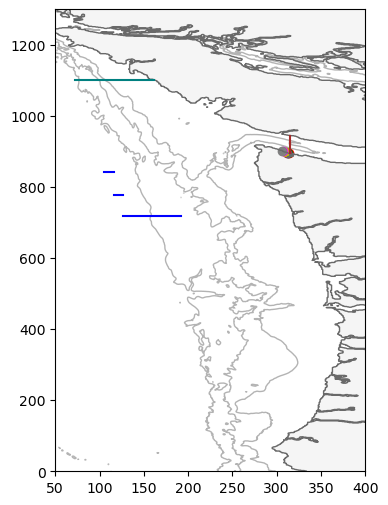

In [24]:
fig, ax = plt.subplots(1,1,figsize=(4, 6))

X, Y = np.meshgrid(grid.xi_rho,grid.eta_rho)

ax.contourf(X, Y, grid.mask_rho, levels=[-0.01, 0.01], colors='whitesmoke')
ax.contour(X, Y, grid.mask_rho, linewidths=1, levels=[-0.01, 0.01], colors='dimgray')
ax.contour(X, Y,grid.h, linewidths=1, levels=[200, 1000, 2000], colors='dimgray', alpha=0.5)

# the coast crash spots
ax.scatter([315-1],[896-1],c='r') # 149
ax.scatter([314-1],[897-1],c='g') # 17
ax.scatter([311-1],[900-1],c='orange') # 25
ax.scatter([313-1],[898-1],c='purple') # 8
ax.scatter([312-1],[899-1],c='y') # 11
ax.scatter([308-1],[903-1],c='magenta') # 1
ax.scatter([307-1],[904-1],c='grey') # 1

# and the new boundaries
plt.plot([315,315], [896,945], c='brown')
plt.plot([ 72,162],[1103,1103], c='teal')
plt.plot([127,192],[ 718, 718], c='b')
plt.plot([116,127],[ 778, 778], c='b')
plt.plot([105,116],[ 843, 843], c='b')
ax.set_xlim([50,400])

(280.0, 330.0)

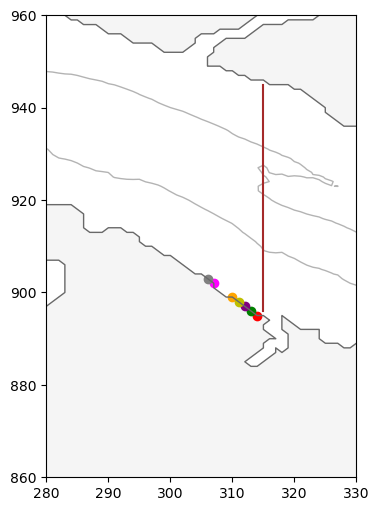

In [25]:
fig, ax = plt.subplots(1,1,figsize=(4, 6))

X, Y = np.meshgrid(grid.xi_rho,grid.eta_rho)

ax.contourf(X, Y, grid.mask_rho, levels=[-0.01, 0.01], colors='whitesmoke')
ax.contour(X, Y, grid.mask_rho, linewidths=1, levels=[-0.01, 0.01], colors='dimgray')
ax.contour(X, Y,grid.h, linewidths=1, levels=[200, 1000, 2000], colors='dimgray', alpha=0.5)

# the coast crash spots
ax.scatter([315-1],[896-1],c='r') # 149
ax.scatter([314-1],[897-1],c='g') # 17
ax.scatter([311-1],[900-1],c='orange') # 25
ax.scatter([313-1],[898-1],c='purple') # 8
ax.scatter([312-1],[899-1],c='y') # 11
ax.scatter([308-1],[903-1],c='magenta') # 1
ax.scatter([307-1],[904-1],c='grey') # 1

# and the new boundaries
plt.plot([315,315], [896,945], c='brown')
plt.plot([ 72,162],[1103,1103], c='teal')
plt.plot([127,192],[ 718, 718], c='b')
plt.plot([116,127],[ 778, 778], c='b')
plt.plot([105,116],[ 843, 843], c='b')
plt.plot([ 94,105],[ 908, 908], c='b')
plt.plot([ 83, 94],[ 973, 973], c='b')
plt.plot([ 72, 83],[1038,1038], c='b')
plt.plot([ 72, 72],[1038,1102], c='b')
plt.plot([ 83, 83],[ 973,1038], c='b')
plt.plot([ 94, 94],[ 908, 973], c='b')
plt.plot([105,105],[ 843, 908], c='b')
plt.plot([116,116],[ 778, 843], c='b')
plt.plot([127,127],[ 718, 778], c='b')
plt.plot([192,318],[ 718, 718], c='teal')

ax.set_ylim([860,960])
ax.set_xlim([280,330])

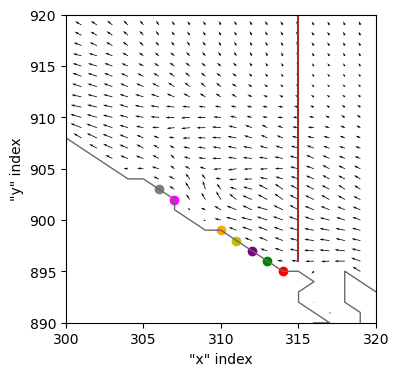

In [26]:
X, Y = np.meshgrid(grid.xi_rho,grid.eta_rho)
k=0
xmin, xmax = 300,320
ymin, ymax = 890,920

# Make plot area

fig, ax = plt.subplots(1,1,figsize=(4,4))

    # Overlay domain landmask and coastline
# ax.contourf(X, Y, grid.mask_rho, levels=[-0.01, 0.01], colors='whitesmoke')
ax.contour(X, Y, grid.mask_rho, linewidths=1, levels=[-0.01, 0.01], colors='dimgray')
# ax.contour(X, Y,grid.h, linewidths=1, levels=[5, 10, 20, 100], colors='dimgray', alpha=0.5)
ax.set_ylim([ymin,ymax])
ax.set_xlim([xmin,xmax])
ax.set_ylabel('"y" index')
ax.set_xlabel('"x" index')

# QUIVER! 
ax.quiver(X[ymin:ymax,xmin:xmax],Y[ymin:ymax,xmin:xmax],data.u[0,k,ymin:ymax,xmin:xmax],data.v[0,k,ymin:ymax,xmin:xmax])

# the coast crash spots
ax.scatter([315-1],[896-1],c='r') # 149
ax.scatter([314-1],[897-1],c='g') # 17
ax.scatter([311-1],[900-1],c='orange') # 25
ax.scatter([313-1],[898-1],c='purple') # 8
ax.scatter([312-1],[899-1],c='y') # 11
ax.scatter([308-1],[903-1],c='magenta') # 1
ax.scatter([307-1],[904-1],c='grey') # 1

# and the new boundaries
plt.plot([315,315], [896,945], c='brown')

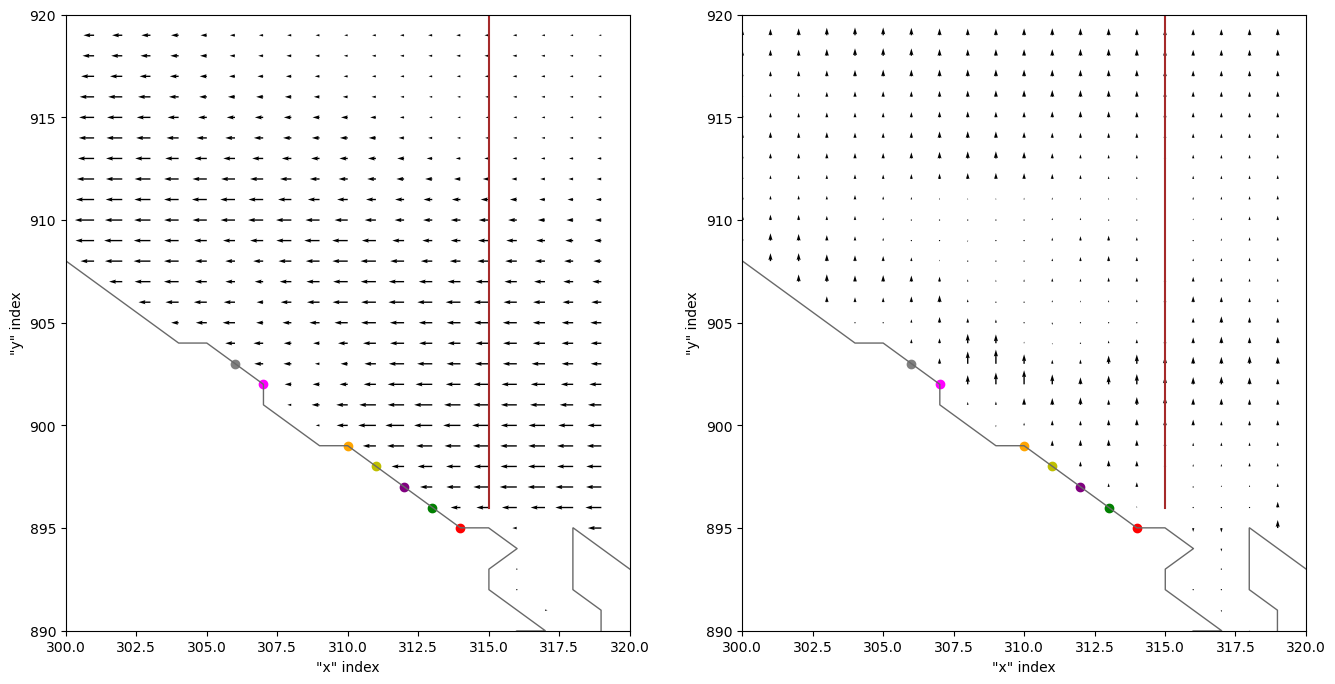

In [27]:
# u and v seperately instead of a quiver
fig, axs = plt.subplots(1,2, figsize=(16,8))

X, Y = np.meshgrid(grid.xi_rho,grid.eta_rho)
uv_zero = np.zeros(np.shape(Y))

xmin, xmax = 300,320
ymin, ymax = 890,920

# Make plot area
for ax in axs:
    ax.contour(X, Y, grid.mask_rho, linewidths=1, levels=[-0.01, 0.01], colors='dimgray')
    ax.set_ylim([ymin,ymax])
    ax.set_xlim([xmin,xmax])
    ax.set_ylabel('"y" index')
    ax.set_xlabel('"x" index')

    # the coast crash spots
    ax.scatter([315-1],[896-1],c='r') # 149
    ax.scatter([314-1],[897-1],c='g') # 17
    ax.scatter([311-1],[900-1],c='orange') # 25
    ax.scatter([313-1],[898-1],c='purple') # 8
    ax.scatter([312-1],[899-1],c='y') # 11
    ax.scatter([308-1],[903-1],c='magenta') # 1
    ax.scatter([307-1],[904-1],c='grey') # 1

    # and the new boundaries
    ax.plot([315,315], [896,945], c='brown')



# QUIVER (kinda)! 
axs[0].quiver(X[ymin:ymax,xmin:xmax],Y[ymin:ymax,xmin:xmax],data.u[0,k,ymin:ymax,xmin:xmax],uv_zero[ymin:ymax,xmin:xmax],scale=15)
axs[1].quiver(X[ymin:ymax,xmin:xmax],Y[ymin:ymax,xmin:xmax],uv_zero[ymin:ymax,xmin:xmax],data.v[0,k,ymin:ymax,xmin:xmax],scale=15)

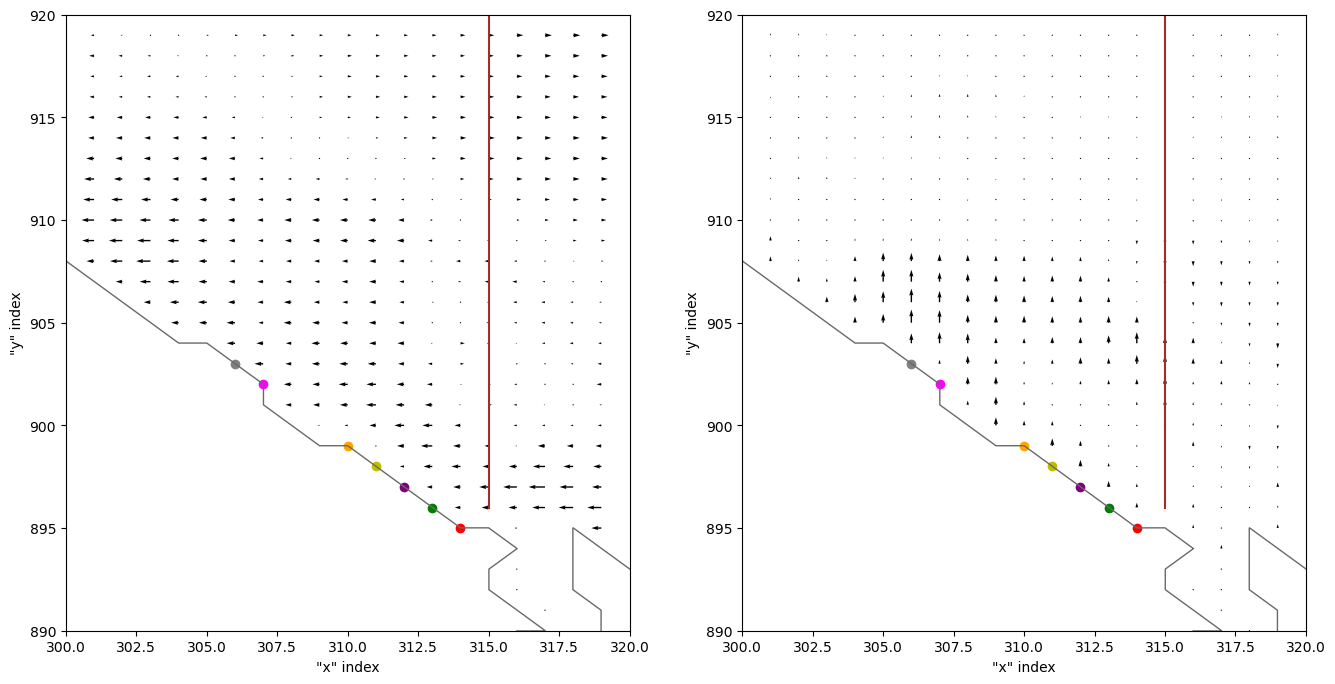

In [28]:
# same thing but for timestep WITHOUT CRASH
# u and v seperately instead of a quiver
fig, axs = plt.subplots(1,2, figsize=(16,8))

X, Y = np.meshgrid(grid.xi_rho,grid.eta_rho)
uv_zero = np.zeros(np.shape(Y))

xmin, xmax = 300,320
ymin, ymax = 890,920

# Make plot area
for ax in axs:
    ax.contour(X, Y, grid.mask_rho, linewidths=1, levels=[-0.01, 0.01], colors='dimgray')
    ax.set_ylim([ymin,ymax])
    ax.set_xlim([xmin,xmax])
    ax.set_ylabel('"y" index')
    ax.set_xlabel('"x" index')

    # the coast crash spots
    ax.scatter([315-1],[896-1],c='r') # 149
    ax.scatter([314-1],[897-1],c='g') # 17
    ax.scatter([311-1],[900-1],c='orange') # 25
    ax.scatter([313-1],[898-1],c='purple') # 8
    ax.scatter([312-1],[899-1],c='y') # 11
    ax.scatter([308-1],[903-1],c='magenta') # 1
    ax.scatter([307-1],[904-1],c='grey') # 1

    # and the new boundaries
    ax.plot([315,315], [896,945], c='brown')



# QUIVER (kinda)! 
axs[0].quiver(X[ymin:ymax,xmin:xmax],Y[ymin:ymax,xmin:xmax],works.u[0,k,ymin:ymax,xmin:xmax],uv_zero[ymin:ymax,xmin:xmax],scale=15)
axs[1].quiver(X[ymin:ymax,xmin:xmax],Y[ymin:ymax,xmin:xmax],uv_zero[ymin:ymax,xmin:xmax],works.v[0,k,ymin:ymax,xmin:xmax],scale=15)

(890.0, 920.0)

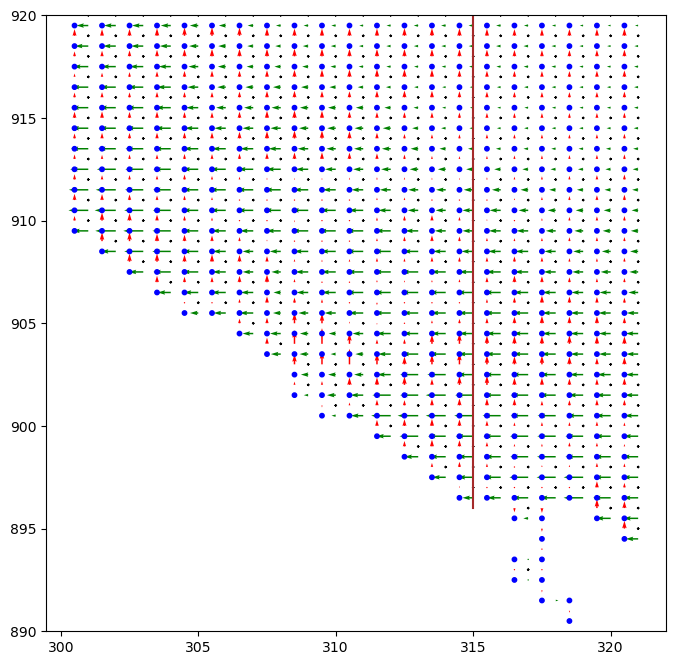

In [29]:
fig, ax = plt.subplots(1,1,figsize=(8,8))

xmin, xmax = 300,320
ymin, ymax = 890,920

x = np.arange(xmin, xmax+1)
y = np.arange(ymin, ymax+1)
X, Y = np.meshgrid(x,y)
uv_zero = np.zeros(np.shape(X))
k=0

ax.scatter(X+0.5,Y+0.5,grid.mask_rho[ymin:ymax+1,xmin:xmax+1]*10,c='b',zorder=2)
ax.scatter(X+1,Y+1,grid.mask_psi[ymin:ymax+1,xmin:xmax+1],c='k',marker='x',zorder=2) # only at points that boarder 4 unmasked cells
# ax.scatter(X+1,Y+0.5,grid.mask_u[ymin:ymax+1,xmin:xmax+1]*10,c='g',marker='_', zorder=2)
# ax.scatter(X+0.5,Y+1,grid.mask_v[ymin:ymax+1,xmin:xmax+1]*10,c='r',marker='|',zorder=2)
ax.quiver(X+1,Y+0.5,data.u[0,k,ymin:ymax+1,xmin:xmax+1],uv_zero,scale=15,color='g')
ax.quiver(X+0.5,Y+1,uv_zero,data.v[0,k,ymin:ymax+1,xmin:xmax+1],scale=15,color='r')

# and the new boundaries
ax.plot([315,315], [896,945], c='brown')

ax.set_ylim([ymin,ymax])

(890.0, 920.0)

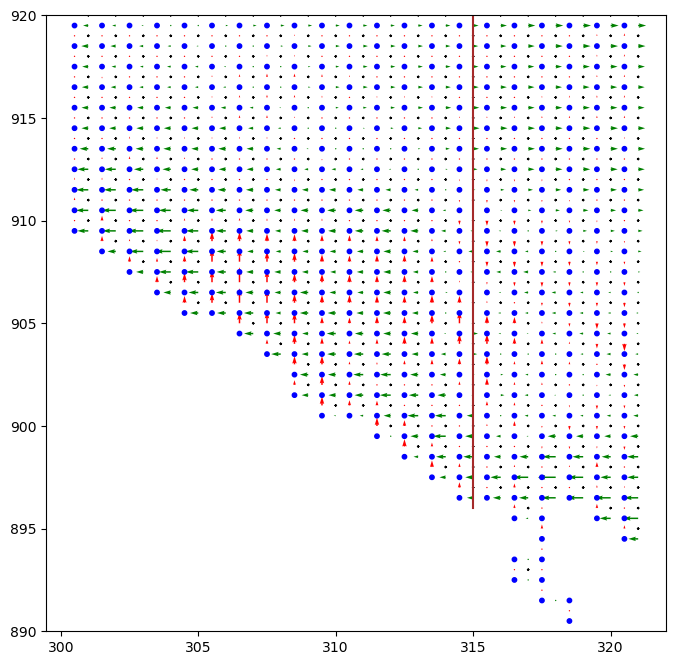

In [30]:
# same thing but for WORKING TIMESTEP
fig, ax = plt.subplots(1,1,figsize=(8,8))

xmin, xmax = 300,320
ymin, ymax = 890,920

x = np.arange(xmin, xmax+1)
y = np.arange(ymin, ymax+1)
X, Y = np.meshgrid(x,y)
uv_zero = np.zeros(np.shape(X))
k=0

ax.scatter(X+0.5,Y+0.5,grid.mask_rho[ymin:ymax+1,xmin:xmax+1]*10,c='b',zorder=2)
ax.scatter(X+1,Y+1,grid.mask_psi[ymin:ymax+1,xmin:xmax+1],c='k',marker='x',zorder=2) # only at points that boarder 4 unmasked cells
# ax.scatter(X+1,Y+0.5,grid.mask_u[ymin:ymax+1,xmin:xmax+1]*10,c='g',marker='_', zorder=2)
# ax.scatter(X+0.5,Y+1,grid.mask_v[ymin:ymax+1,xmin:xmax+1]*10,c='r',marker='|',zorder=2)
ax.quiver(X+1,Y+0.5,works.u[0,k,ymin:ymax+1,xmin:xmax+1],uv_zero,scale=15,color='g')
ax.quiver(X+0.5,Y+1,uv_zero,works.v[0,k,ymin:ymax+1,xmin:xmax+1],scale=15,color='r')

# and the new boundaries
ax.plot([315,315], [896,945], c='brown')

ax.set_ylim([ymin,ymax])

##### susan had the good point that it doesn't look like the u and v velocities into the coast crash cells could possibly be balancing during the failing timesteps... lets see if w can make up for it?

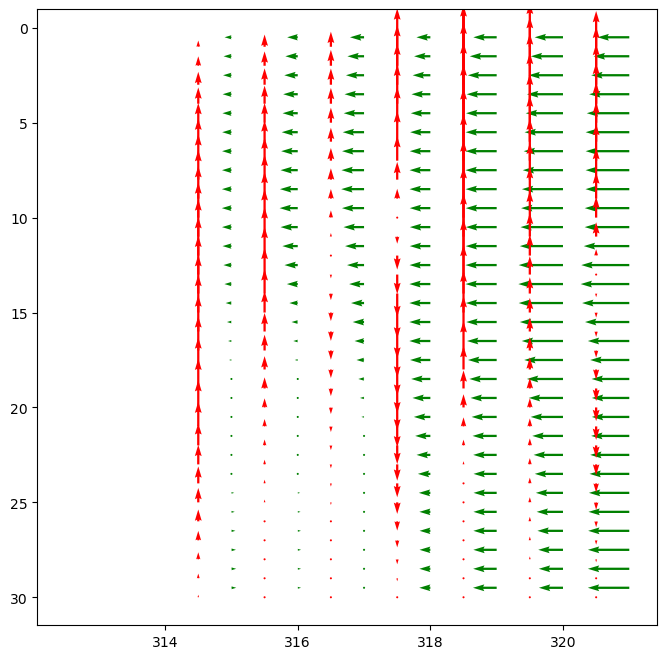

In [82]:
fig, ax = plt.subplots(1,1,figsize=(8,8))

xmin, xmax = 312,320
zmin, zmax = 0,29

x = np.arange(xmin, xmax+1)
z = np.arange(zmin, zmax+1)
X, Z = np.meshgrid(x,z)
vw_zero = np.zeros(np.shape(X))
k=0

U = data.u[0,:,896,xmin:xmax+1] * ((data.s_w*grid.h[896, xmin:xmax+1])[1:,:].values - (data.s_w*grid.h[896, xmin:xmax+1])[:-1,:].values) * 500
W = data.w[0,:-1,896,xmin:xmax+1] * 500 * 500

ax.quiver(X+1,Z+0.5,U,vw_zero,color='g')
ax.quiver(X+0.5,Z+1,vw_zero,W,color='r')



# and the new boundaries
# ax.plot([315,315], [896,945], c='brown')
ax.invert_yaxis()
# ax.set_ylim([ymin,ymax])

In [85]:
np.min(U-W)

<xarray.DataArray ()> Size: 8B
array(-2571.41693077)
Coordinates:
    ocean_time  datetime64[ns] 8B 2017-10-12T22:00:00

In [86]:
np.max(U-W)


<xarray.DataArray ()> Size: 8B
array(615.50318076)
Coordinates:
    ocean_time  datetime64[ns] 8B 2017-10-12T22:00:00

In [34]:
print(data.v[0,0,[900-1],[311-1]].values)
print(data.u[0,0,[900-1],[311-1]].values)
# ok and the values going into the cell are also nan so idk how it got there


[[nan]]
[[nan]]


In [35]:
# maybe its where there initialised that's the problem??
# all coast crashes from x=312 and y = 899 or 900

print(grid.mask_rho[898,311].values)
print(grid.mask_rho[899,311].values)

# maybe this is the issue? says that x=312, y=899 is land

0.0
1.0


## grid compare

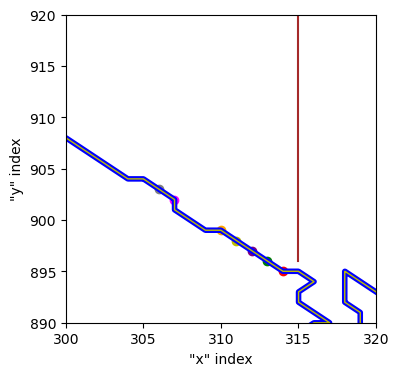

In [36]:
X, Y = np.meshgrid(grid.xi_rho,grid.eta_rho)
xmin, xmax = 300,320
ymin, ymax = 890,920

# Make plot area

fig, ax = plt.subplots(1,1,figsize=(4,4))

# Overlay domain landmask and coastline - grid 7
X, Y = np.meshgrid(grid.xi_rho,grid.eta_rho)
ax.contour(X, Y, grid.mask_rho, linewidths=4, levels=[-0.01, 0.01], colors='b')
ax.set_ylim([ymin,ymax])
ax.set_xlim([xmin,xmax])
ax.set_ylabel('"y" index')
ax.set_xlabel('"x" index')

# Overlay domain landmask and coastline - grid 6
X, Y = np.meshgrid(grid6.xi_rho,grid6.eta_rho)
ax.contour(X, Y, grid6.mask_rho, linewidths=1, levels=[-0.01, 0.01], colors='y')
ax.set_ylim([ymin,ymax])
ax.set_xlim([xmin,xmax])
ax.set_ylabel('"y" index')
ax.set_xlabel('"x" index')

# # the coast crash spots
ax.scatter([315-1],[896-1],c='r') # 149
ax.scatter([314-1],[897-1],c='g') # 17
ax.scatter([311-1],[900-1],c='orange') # 25
ax.scatter([313-1],[898-1],c='purple') # 8
ax.scatter([312-1],[899-1],c='y') # 11
ax.scatter([308-1],[903-1],c='magenta') # 1
ax.scatter([307-1],[904-1],c='grey') # 1



# and the new boundaries
plt.plot([315,315], [896,945], c='brown')

(890.0, 920.0)

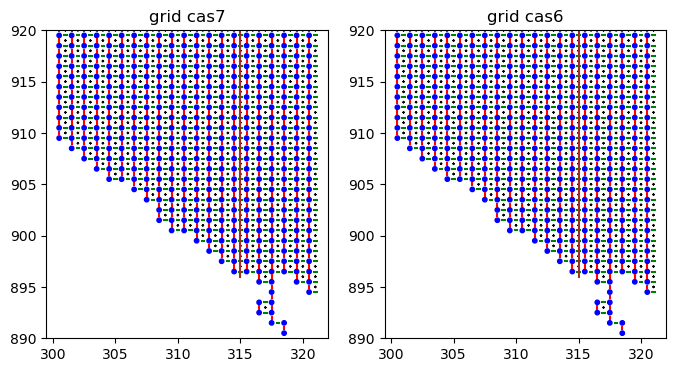

In [37]:
fig, ax = plt.subplots(1,2,figsize=(8,4))

xmin, xmax = 300,320
ymin, ymax = 890,920

x = np.arange(xmin, xmax+1)
y = np.arange(ymin, ymax+1)
X, Y = np.meshgrid(x,y)

ax[0].scatter(X+0.5,Y+0.5,grid.mask_rho[ymin:ymax+1,xmin:xmax+1]*10,c='b',zorder=2)
ax[0].scatter(X+1,Y+1,grid.mask_psi[ymin:ymax+1,xmin:xmax+1],c='k',marker='x',zorder=2) # only at points that boarder 4 unmasked cells
ax[0].scatter(X+1,Y+0.5,grid.mask_u[ymin:ymax+1,xmin:xmax+1]*10,c='g',marker='_', zorder=2)
ax[0].scatter(X+0.5,Y+1,grid.mask_v[ymin:ymax+1,xmin:xmax+1]*10,c='r',marker='|',zorder=2)
ax[0].set_title('grid cas7')


ax[1].scatter(X+0.5,Y+0.5,grid6.mask_rho[ymin:ymax+1,xmin:xmax+1]*10,c='b',zorder=2)
ax[1].scatter(X+1,Y+1,grid6.mask_psi[ymin:ymax+1,xmin:xmax+1],c='k',marker='x',zorder=2) # only at points that boarder 4 unmasked cells
ax[1].scatter(X+1,Y+0.5,grid6.mask_u[ymin:ymax+1,xmin:xmax+1]*10,c='g',marker='_', zorder=2)
ax[1].scatter(X+0.5,Y+1,grid6.mask_v[ymin:ymax+1,xmin:xmax+1]*10,c='r',marker='|',zorder=2)
ax[1].set_title('grid cas6')

# and the new boundaries
ax[1].plot([315,315], [896,945], c='brown')
ax[0].plot([315,315], [896,945], c='brown')

ax[0].set_ylim([ymin,ymax])
ax[1].set_ylim([ymin,ymax])



In [38]:
pd.read_csv(file_path, delim_whitespace= True, skiprows=14)

NameError: name 'pd' is not defined

In [14]:
# datetimes with craches

tcrash = [datetime(2017,10,12,14),datetime(2017,10,12,15),datetime(2017,10,12,16),datetime(2017,10,12,17),datetime(2017,10,12,18),datetime(2017,10,12,22),datetime(2017,10,12,23)]

/tmp/ipykernel_128217/3818046827.py:13: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(file_path, delim_whitespace=True, skiprows=14,


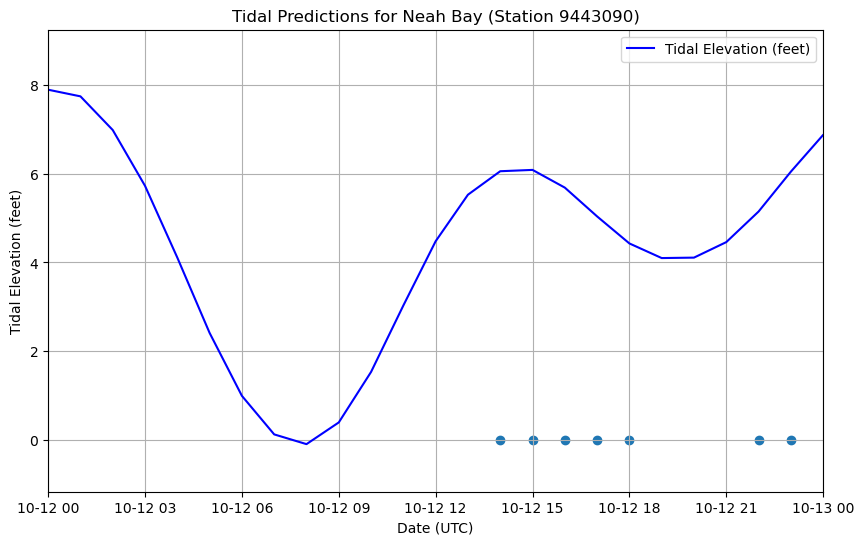

In [15]:
# is is happening during certain times in the tidal cycle?
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import pytz
import numpy as np

# Load the data
file_path = '/data1/bbeutel/LO_user/ariane/9443090.txt'

# Read the file into a pandas DataFrame
# Notice that we read in the 'Time' and 'AM/PM' separately
data = pd.read_csv(file_path, delim_whitespace=True, skiprows=14, 
                   names=['Date', 'Day', 'Time', 'AMPM', 'Pred'])

# Combine 'Time' and 'AMPM' into a single 'Time' column
data['Time'] = data['Time'] + ' ' + data['AMPM']

# Drop the 'AMPM' column as it is no longer needed
data = data.drop(columns=['AMPM'])

# Combine 'Date' and 'Time' into a single datetime column
data['Date_Time'] = pd.to_datetime(data['Date'] + ' ' + data['Time'], format='%Y/%m/%d %I:%M %p')

# Assuming the data is in Pacific Time (PT), convert to UTC
data['Date_Time'] = data['Date_Time'].dt.tz_localize('US/Pacific').dt.tz_convert('UTC')

# Plot the tidal predictions
plt.figure(figsize=(10, 6))
plt.plot(data['Date_Time'], data['Pred'], label='Tidal Elevation (feet)', color='blue')
plt.title('Tidal Predictions for Neah Bay (Station 9443090)')
plt.xlabel('Date (UTC)')
plt.ylabel('Tidal Elevation (feet)')
plt.scatter(tcrash, np.zeros(len(tcrash)))
plt.grid(True)
plt.legend()
plt.xlim([datetime(2017,10,12,0),datetime(2017,10,13,0)])
plt.show()